# Census Visualization: Dashboard 

author: Keanna Knebel 

date: 2020-06-03

In [1]:
import pandas as pd
import geopandas as gpd
import json
import altair as alt
import plotly.express as px

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
from dash.dependencies import Input, Output

px.set_mapbox_access_token('pk.eyJ1IjoiY29jbzE4IiwiYSI6ImNrYXpyNzlldjAxMHAyc3F1dHFyNzFxcm8ifQ.x3S3Icl2TOpsoQsP21dTpQ')

In [10]:
# Load Data
df = pd.read_csv("../../data/processed/census_viz.csv")
x = list(df.columns)


boundary = gpd.read_file("../../data/raw/local_area_boundary.geojson")

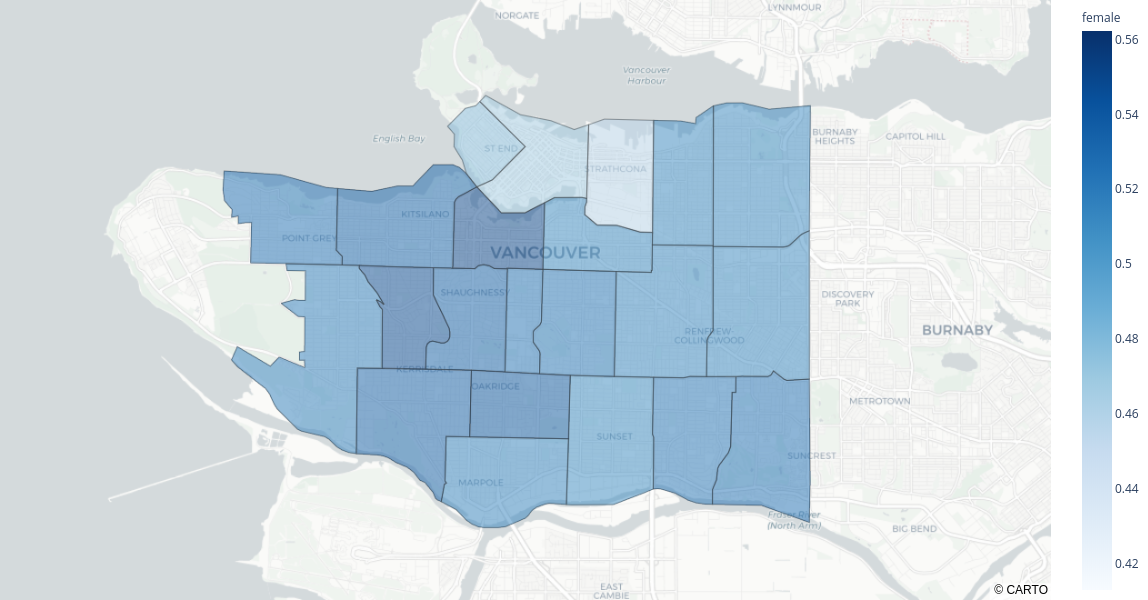

In [56]:
# make local area map graph

choro = px.choropleth_mapbox(df,
                             geojson= boundary,
                             locations='LocalArea',
                             featureidkey='properties.name',
                             opacity=0.5,
                             color='female',
                             color_continuous_scale=px.colors.sequential.Blues,
                             hover_name = 'LocalArea',
                             mapbox_style="carto-positron",
                             center={"lat": 49.250, "lon": -123.121},
                             zoom=11,
                             height=600,
                             width=1200)
choro.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
config = {'displayModeBar': False}
choro.show()

In [152]:
# Build App
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

### App Layout Begins ###
app.layout = html.Div([
    
    # Main app header
    html.Div([
        # Setting the main title of the Dashboard
        html.H1("Forecasting the Evolution of Vancouver's Business Landscape",
                style={"textAlign": "center", 'fontFamily': 'arial',
                       'marginTop': 50, 'marginBottom': 50, 
                       'marginLeft': 100, 'marginRight': 100})],
        style={'Color': '#2E4053'}),
    
    # Dividing the dashboard in 3 tabs
    dcc.Tabs(id="mainTabs", children=[
        
        # Define the layout of the first Tab
        dcc.Tab(label='Main', children=[
            
                ]),
        
        # Define the layout of the second Tab
        dcc.Tab(label='Neighbourhood Profiles', children=[
            
            # neighbourhood tab header 
            html.Div([
                html.H2("VANCOUVER NEIGHBOURHOODS", style={"textAlign": "center"}),
                html.H6("Click the map to explore Vancouver Neighbourhoods",
                        style={"textAlign": "center"})], 
                style={'marginTop': 50}),
            
            # main map of neighbourhoods 
            dcc.Graph(figure=choro, config=config),
            
            # Adding tabs for summary neighbourhood data
            dcc.Tabs(id="subTabs", children=[
                
                # summary of local demographics
                dcc.Tab(label='People', children=[
            
                ]),
                
                # summary of local business structure
                dcc.Tab(label='Businesses', children=[
            
                ])
           
            ], style={'marginTop': 50}),
        ]),
        
        # Define the layout of the third Tab
        dcc.Tab(label='Sources')
    ]),
    
    # main app footer
    html.Footer([
        
        html.H4("PROJECT PARTNERS", style={"textAlign": "center", 'marginBottom': 50}),
        dbc.Row([
            dbc.Col([
                html.Img(src="https://brand3.sites.olt.ubc.ca/files/2018/09/5NarrowLogo_ex_768.png", 
                         style={"width":"100%"})],
                width=4, align='end'),
            dbc.Col([
                html.Img(src="https://deetken.com/wp-content/uploads/2019/02/logo-1.png", 
                         style={"width":"100%"})],
                width=4)
        ], justify="center"),
    ], style={'marginTop': 100}),
])



In [153]:
# Define callback to update graph
#@app.callback(
 #   Output('graph', 'figure'),
  #  [Input("colorscale-dropdown", "value")]
#)

#def update_figure(colorscale):
 #   return px.scatter(
  #      df, x="total_bill", y="tip", color="size",
   #     color_continuous_scale=colorscale,
    #    render_mode="webgl", title="Tips")

In [154]:
# Run app and display result in seperate tab/notebook
app.run_server(mode="jupyterlab", debug=False)

127.0.0.1 - - [07/Jun/2020 16:13:31] "GET /_shutdown_79e151a4-5a16-4ba9-9448-935d6b00e30f HTTP/1.1" 200 -
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Jun/2020 16:13:31] "GET /_alive_79e151a4-5a16-4ba9-9448-935d6b00e30f HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 16:13:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 16:13:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 16:13:31] "GET /_dash-layout HTTP/1.1" 200 -
